In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data_scaled.csv')
data

,SP,RP,SRP,LRP,FHP,BHP,RANK,RANKDIFF,SA,SRA,FHA,BALANCE,WON
0,0.600,0.400,0.244,0.756,0.511,0.489,1,-0.062078,0.200,-0.512,0.022,0.353155,1.0
1,0.666,0.334,0.194,0.806,0.171,0.829,12,0.062078,0.332,-0.612,-0.658,0.879854,-1.0
2,0.522,0.478,0.295,0.705,0.720,0.280,3,-0.039504,0.044,-0.410,0.440,0.450243,1.0
3,0.558,0.442,0.205,0.795,0.617,0.383,10,0.039504,0.116,-0.590,0.234,0.478155,-1.0
4,0.561,0.439,0.157,0.843,0.578,0.422,3,0.011287,0.122,-0.686,0.156,0.492718,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0.552,0.448,0.421,0.579,0.702,0.298,368,2.020364,0.104,-0.158,0.404,0.311893,-1.0
354,0.555,0.445,0.361,0.639,0.638,0.362,28,-0.152374,0.110,-0.278,0.276,0.310680,-1.0
355,0.525,0.475,0.275,0.725,0.615,0.385,55,0.152374,0.050,-0.450,0.230,0.350728,1.0
356,0.512,0.488,0.179,0.821,0.666,0.334,10,-0.744939,0.024,-0.642,0.332,0.513350,1.0


In [3]:
columns = ['SP', 'RP', 'SRP', 'LRP', 'FHP', 'BHP', 'RANK', 'RANKDIFF', 'SA', 'SRA', 'FHA', 'BALANCE']

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['WON']), data.WON, train_size=0.8)

In [6]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6944444444444444

In [7]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [9]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 257, 505, 752, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [10]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [80,90],
    'max_features': [4],
    'min_samples_leaf': [4,5,6,7],
    #'min_samples_split': [9,10,11],
    'n_estimators': [100,140,150,200]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = cv, n_jobs = -1, verbose = 2)

In [11]:
grid_result = grid_search.fit(data[columns], data.WON)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 30 folds for each of 32 candidates, totalling 960 fits
Best: 0.698413 using {'max_depth': 80, 'max_features': 4, 'min_samples_leaf': 7, 'n_estimators': 150}
0.680794 (0.064193) with: {'max_depth': 80, 'max_features': 4, 'min_samples_leaf': 4, 'n_estimators': 100}
0.676032 (0.064548) with: {'max_depth': 80, 'max_features': 4, 'min_samples_leaf': 4, 'n_estimators': 140}
0.688228 (0.064540) with: {'max_depth': 80, 'max_features': 4, 'min_samples_leaf': 4, 'n_estimators': 150}
0.687222 (0.068345) with: {'max_depth': 80, 'max_features': 4, 'min_samples_leaf': 4, 'n_estimators': 200}
0.682460 (0.066169) with: {'max_depth': 80, 'max_features': 4, 'min_samples_leaf': 5, 'n_estimators': 100}
0.682619 (0.071577) with: {'max_depth': 80, 'max_features': 4, 'min_samples_leaf': 5, 'n_estimators': 140}
0.688148 (0.067197) with: {'max_depth': 80, 'max_features': 4, 'min_samples_leaf': 5, 'n_estimators': 150}
0.683439 (0.073468) with: {'max_depth': 80, 'max_features': 4, 'min_samples_leaf': 5, 

In [12]:
grid_result = grid_search.fit(data[columns], data.WON)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 30 folds for each of 32 candidates, totalling 960 fits
Best: 0.697540 using {'max_depth': 80, 'max_features': 4, 'min_samples_leaf': 7, 'n_estimators': 150}
0.673386 (0.077965) with: {'max_depth': 80, 'max_features': 4, 'min_samples_leaf': 4, 'n_estimators': 100}
0.685291 (0.071321) with: {'max_depth': 80, 'max_features': 4, 'min_samples_leaf': 4, 'n_estimators': 140}
0.676138 (0.068089) with: {'max_depth': 80, 'max_features': 4, 'min_samples_leaf': 4, 'n_estimators': 150}
0.679841 (0.072277) with: {'max_depth': 80, 'max_features': 4, 'min_samples_leaf': 4, 'n_estimators': 200}
0.685344 (0.070112) with: {'max_depth': 80, 'max_features': 4, 'min_samples_leaf': 5, 'n_estimators': 100}
0.674180 (0.072690) with: {'max_depth': 80, 'max_features': 4, 'min_samples_leaf': 5, 'n_estimators': 140}
0.679841 (0.072796) with: {'max_depth': 80, 'max_features': 4, 'min_samples_leaf': 5, 'n_estimators': 150}
0.687275 (0.069751) with: {'max_depth': 80, 'max_features': 4, 'min_samples_leaf': 5, 

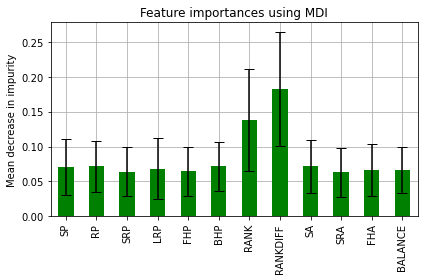

In [15]:
feature_names = ['SP', 'RP', 'SRP', 'LRP', 'FHP', 'BHP', 'RANK', 'RANKDIFF', 'SA', 'SRA', 'FHA', 'BALANCE']
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax, color='g',yerr=std, capsize=5)

ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
ax.set_axisbelow(True)
fig.tight_layout()
plt.grid()
fig.savefig('feature_importance', dpi=300)